In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist

import make_detsys as detsys

In [3]:
from importlib import reload
import logging
reload(logging)

logging.basicConfig(level=logging.DEBUG)

In [4]:
RUN = ["3"]

In [5]:
rundata_pi0, mc_weights_pi0, data_pot_pi0 = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue", "drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False
)

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue","drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False
)

1


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


get_rundict: run_number= 1
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
Loading lee sample
3
get_rundict: run_number= 3
1
get_rundict: run_number= 1
3
get_rundict: run_number= 3
1
get_rundict: run_number= 1
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
Loading lee sample
3
get_rundict: run_number= 3
1
get_rundict: run_number= 1
3
get_rundict: run_number= 3


DEBUG:root:Selection query: nslice == 1 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and nslice == 1 & pi0_shrscore1 < 0.500000 & pi0_shrscore2 < 0.500000& pi0_dot1  > 0.800000 & pi0_dot2 > 0.800000  & pi0_radlen1 > 3.000000 & pi0_radlen2 > 3.000000 & pi0_gammadot < 0.940000  & pi0_energy1_Y > 60.000000 & pi0_energy2_Y > 40.000000 and pi0_dedx1_fit_Y >= 1.000000
INFO:root:Making histogram for variation cv


<class 'str'>
3
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
3
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/detvar/nuepresel/high_stat_prodgenie_bnb_nu_overlay_DetVar_Run1_CV_reco2_reco2.root
is_mc= False
3
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
3
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/detvar/nuepresel/prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root
is_mc= False
3


DEBUG:root:Removing 296 truth filtered events from nue in cv


get_rundict: run_number= 3
cv
Selected nues:
21881
Selected numus:
7651


DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None)
DEBUG:microfit.histogram.histogram_generator:Generated histogram: Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None), bin_counts=[2.2806732499292822e-18+/-1.1715031582770248e-19
 1.6247540302926187e-18+/-9.887938142096633e-20], label=, tex=)
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino

Starting generate
False
Starting generate
False
<class 'str'>
3
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
3
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/detvar/nuepresel/high_stat_prodgenie_bnb_nu_overlay_DetVar_Run1_ThetaYZ_reco2_reco2.root
is_mc= False
3
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
3
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/detvar/nuepresel/prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleYZ_v08_00_00_42_run1_reco2_reco2.root
is_mc= False
3


DEBUG:root:Removing 295 truth filtered events from nue in wiremodthetayz


get_rundict: run_number= 3
wiremodthetayz
Selected nues:
25802
Selected numus:
7720


DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None)
DEBUG:microfit.histogram.histogram_generator:Generated histogram: Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None), bin_counts=[2.304743680007691e-18+/-1.177669006961223e-19
 1.6067012077338125e-18+/-9.832851707115805e-20], label=, tex=)
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino r

Starting generate
False
Starting generate
False
PI0
PI0


DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


reco_e
reco_e


DEBUG:microfit.histogram.run_hist_generator:Applying query nslice == 1 and contained_fraction > 0.4 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and nslice == 1 & pi0_shrscore1 < 0.500000 & pi0_shrscore2 < 0.500000& pi0_dot1  > 0.800000 & pi0_dot2 > 0.800000  & pi0_radlen1 > 3.000000 & pi0_radlen2 > 3.000000 & pi0_gammadot < 0.940000  & pi0_energy1_Y > 60.000000 & pi0_energy2_Y > 40.000000 and pi0_dedx1_fit_Y >= 1.000000 to all dataframes.
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key='PI0', preselection_key='PI0', selection_tex='$\\pi^0$ selection', selection_tex_short='$\\pi^0$')
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='

Starting plot
Check 1: True
gen= <class 'microfit.histogram.run_hist_generator.RunHistGenerator'>
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Check 2: True
<class 'microfit.histogram.run_hist_generator.RunHistGenerator'>
Starting get_mc_hist
Starting generate
True


DEBUG:microfit.histogram.histogram_generator:Calculated covariance matrix for weightsGenie.
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution: [52.36274939 43.86627426]
DEBUG:microfit.histogram.histogram_generator:Calculated covariance matrix for weightsFlux.
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution: [24.39934223 24.06134642]
DEBUG:microfit.histogram.histogram_generator:Calculated covariance matrix for weightsReint.
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution: [6.57178486 4.94426773]
DEBUG:microfit.histogram.histogram_generator:Calculating unisim uncertainties
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution for knob knobRPA: [0.33081237 0.57630925]
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution for knob knobCCMEC: [1.65764435 1.40621746]
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution for knob knobAxFFCCQE: [0.0066151  0.0033075

Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key='PI0', preselection_key='PI0', selection_tex='$\\pi^0$ selection', selection_tex_short='$\\pi^0$'), bin_counts=[307.104782464434+/-58.66039557059565
 236.32026098667467+/-50.73169399617744], label=, tex=)
Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key='PI0', preselection_key='PI0', selection_tex='$\\pi^0$ selection', selection_tex_short='$\\pi^0$'), bin_counts=[307.104782464434+/-58.66039557059565
 236.32026098667467+/-50.73169399617744], label=, tex=)
Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key

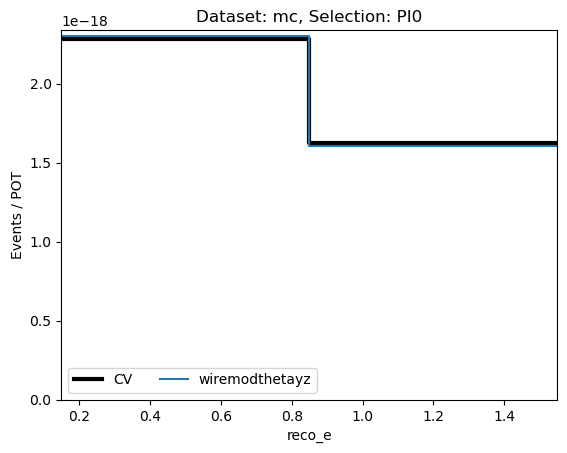

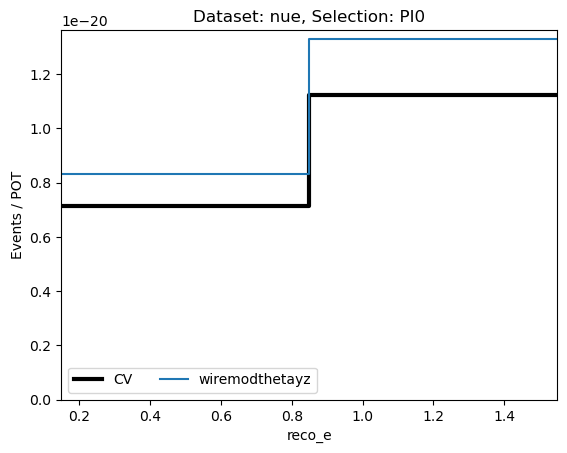

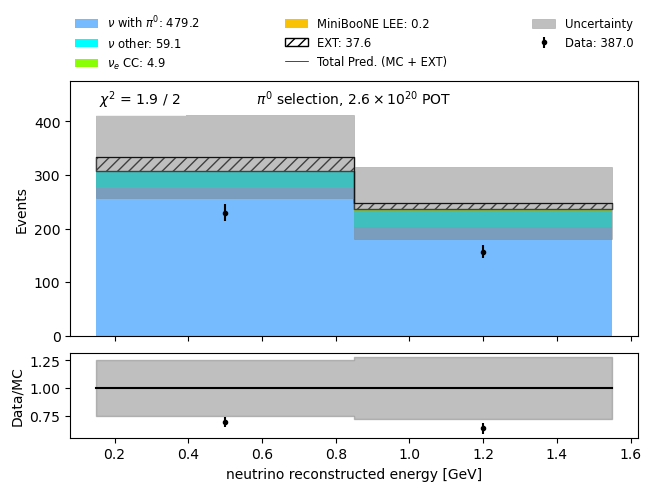

In [16]:
selection = "PI0"
preselection = "PI0"
binning_def = ("reco_e", 2, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
binning = hist.Binning.from_config(*binning_def)
binning.label = "PI0"

detsys.make_variations(
    RUN,
    selection,
    preselection,
    binning,
    make_plots=True,
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False   
)

binning = hist.Binning.from_config(*binning_def)
binning.label = "PI0"
pi0_generator = hist.RunHistGenerator(
    rundata_pi0,
    binning,
    data_pot=data_pot_pi0,
    selection=selection,
    preselection=preselection,
    sideband_generator=None,
    uncertainty_defaults=None,
    detvar_data_path="run_3_PI0_PI0_reco_e.json",
)

plotter_pi0 = rp.RunHistPlotter(pi0_generator, selection_title="pi0 selection")
plotter_pi0.title = plotter_pi0.get_selection_title(selection=selection, preselection=preselection)

plotter_pi0 = rp.RunHistPlotter(pi0_generator)
axes = plotter_pi0.plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    show_data_mc_ratio=True,
    show_chi_square=True,
    smooth_ext_histogram=False,
    add_precomputed_detsys=True
)



DEBUG:root:Selection query: nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and n_showers_contained == 1
INFO:root:Making histogram for variation cv


<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3


DEBUG:root:Removing 296 truth filtered events from nue in cv


get_rundict: run_number= 3
cv
Selected nues:
21881
Selected numus:
7651


DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None)
DEBUG:microfit.histogram.histogram_generator:Generated histogram: Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None), bin_counts=[3.008803759801175e-19+/-4.255091083629987e-20
 2.4070430078409332e-20+/-1.2035215039204716e-20], label=, tex=)
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable

Starting generate
False
Starting generate
False
<class 'str'>
3
get_rundict: run_number= 3
3
get_rundict: run_number= 3
3


DEBUG:root:Removing 295 truth filtered events from nue in wiremodthetayz


get_rundict: run_number= 3
wiremodthetayz
Selected nues:
25802
Selected numus:
7720


DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None)
DEBUG:microfit.histogram.histogram_generator:Generated histogram: Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key=None, preselection_key=None, selection_tex=None, selection_tex_short=None), bin_counts=[3.189331985389245e-19+/-4.380884401326593e-20
 3.0088037598011665e-20+/-1.345577947574477e-20], label=, tex=)
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_

Starting generate
False
Starting generate
False
NPL
NP


DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


reco_e
reco_e


DEBUG:microfit.histogram.run_hist_generator:Applying query nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and n_showers_contained == 1 to all dataframes.
DEBUG:microfit.histogram.histogram_generator:Creating histogram generator for with binning: Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=

Starting plot
Check 1: True
gen= <class 'microfit.histogram.run_hist_generator.RunHistGenerator'>
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Check 2: True
<class 'microfit.histogram.run_hist_generator.RunHistGenerator'>
Starting get_mc_hist
Starting generate
True


DEBUG:microfit.histogram.histogram_generator:Calculated covariance matrix for weightsGenie.
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution: [7.45964962 2.10550591]
DEBUG:microfit.histogram.histogram_generator:Calculated covariance matrix for weightsFlux.
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution: [4.9597027 1.0374758]
DEBUG:microfit.histogram.histogram_generator:Calculated covariance matrix for weightsReint.
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution: [0.98404731 0.25055627]
DEBUG:microfit.histogram.histogram_generator:Calculating unisim uncertainties
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution for knob knobRPA: [1.02405748 0.01100517]
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution for knob knobCCMEC: [0.23375977 1.11315503]
DEBUG:microfit.histogram.histogram_generator:Bin-wise error contribution for knob knobAxFFCCQE: [0.0071191  0.00992278]
DEB

Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key='NPL', preselection_key='NP', selection_tex='1eNp Loose cuts', selection_tex_short='1eNp Loose cuts'), bin_counts=[64.79105352205237+/-9.610196017578625
 18.42036091548694+/-2.5055992822884656], label=, tex=)
Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None, selection_key='NPL', preselection_key='NP', selection_tex='1eNp Loose cuts', selection_tex_short='1eNp Loose cuts'), bin_counts=[64.79105352205237+/-9.610196017578625
 18.42036091548694+/-2.5055992822884656], label=, tex=)
Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='NPL_MEDIUM_PID', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query=None,

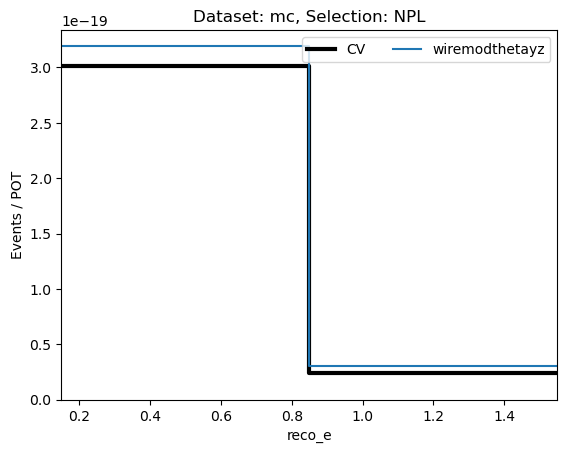

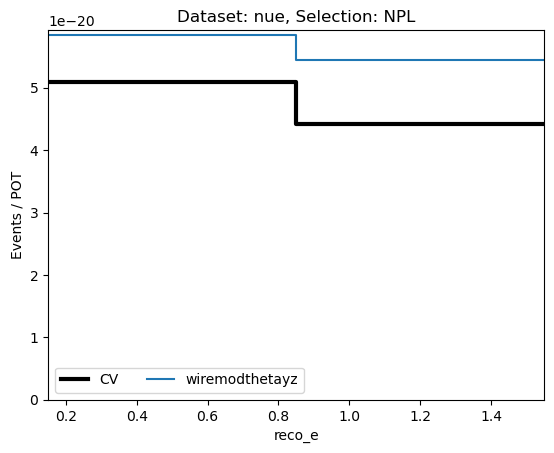

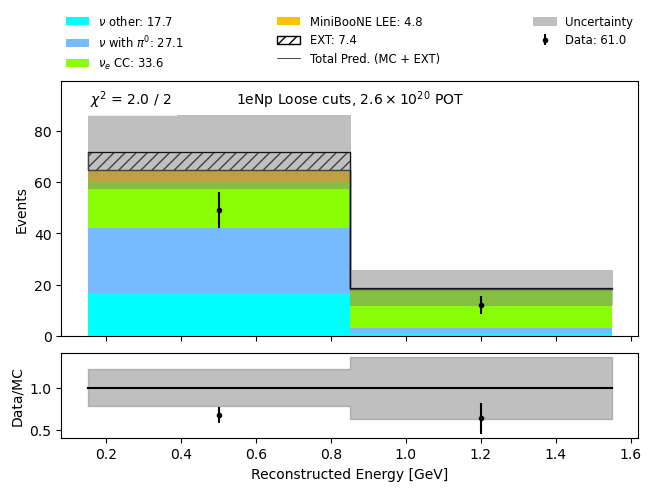

In [18]:
selection = "NPL"
preselection = "NP"
binning_def = ("reco_e", 2, (0.15, 1.55), r"Reconstructed Energy [GeV]")
binning = hist.Binning.from_config(*binning_def)
binning.label = "NPL_MEDIUM_PID"

detsys.make_variations(
    RUN,
    selection,
    preselection,
    binning,
    make_plots=True,
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    enable_cache=True,
    numupresel=False,
    loadnumuvariables=False,
    use_bdt=True,
    load_numu_tki=False
)

signal_generator = hist.RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data_path="run_3_NP_NPL_reco_e.json"
)

plotter = rp.RunHistPlotter(signal_generator)
axes = plotter.plot(
    category_column="paper_category",
    include_multisim_errors=True,
    add_ext_error_floor=False,
    show_data_mc_ratio=True,
    show_chi_square=True,
    smooth_ext_histogram=False,
    add_precomputed_detsys=True
)

DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG:microfit.histogram.histogram_generator:Using cached total covariance matrix.
DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG:microfit.histogram.histogram_generator:Using cached total covariance matrix.
DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG:microfit.histogram.histogram_generator:Using cached total covariance matrix.
DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG:microfit.histogram.histogram_generator:Using cached total covariance matrix.
DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG:microfit.histogram.histogram_generator:Using cached total covariance matrix.
DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG:microfit.histogram.histogram_generator:Using cached total covariance matrix.
DEBUG:microfit.histogram.histogram_generator:Histogram found in cache.
DEBUG

Starting plot
Check 1: True
gen= <class 'microfit.analysis.MultibandAnalysis'>
Starting generate
False
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Starting get_mc_hist
Starting generate
False
Check 2: True
<class 'microfit.analysis.MultibandAnalysis'>
Starting generate
False
Starting generate
False
Starting generate
False
Starting generate
False
Histogram(binning=Binning(variable='reco_e', bin_edges=array([0.15, 0.85, 1.55]), label='PI0', variable_tex='neutrino reconstructed energy [GeV]', is_log=False, selection_query=None, selection_key='PI0', preselection_key='PI0', selection_tex='$\\pi^0$ selection', selection_tex_short='$\\pi^0$'), bin_counts=[307.104782464434+/-77.42241560772173
 236.320260

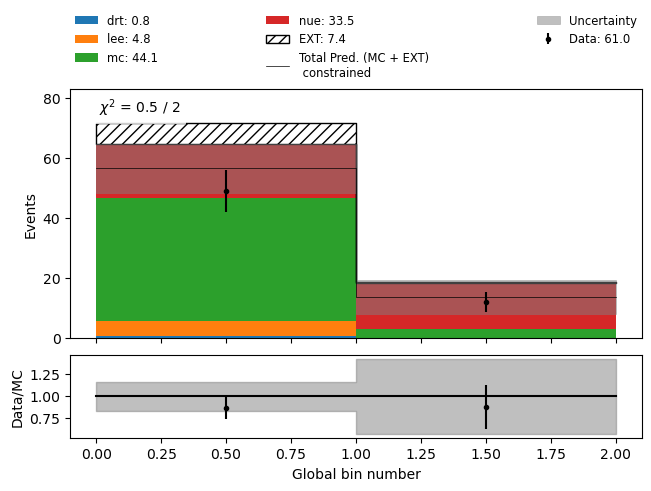

In [9]:
# Create the multi channel binning

from microfit.analysis import MultibandAnalysis
from microfit.histogram import Binning, RunHistGenerator, MultiChannelBinning
from microfit.run_plotter import RunHistPlotter

analysis = MultibandAnalysis(
    run_hist_generators=[pi0_generator,signal_generator],
    constraint_channels=["PI0"],
    signal_channels=["NPL_MEDIUM_PID"],
    
)

plotter = RunHistPlotter(analysis).plot(
    include_multisim_errors=True,
    add_ext_error_floor=False,
    stacked=True,
    show_total=True,
    use_sideband=True,
    show_data_mc_ratio=True,
    show_chi_square=True,
    add_precomputed_detsys=True
    # data_pot=analysis._get_pot_for_channel("NPBDT"),
    # channel="NPBDT",
)

In [ ]:
sideband_generator_pi0 = pi0_generator.get_hist_generator(which="mc")
sideband_total_prediction_pi0 = pi0_generator.get_total_prediction(include_multisim_errors=True)
sideband_observed_hist_pi0 = pi0_generator.get_data_hist()

In [ ]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(level=logging.WARN)

In [ ]:
# we can also extract the histogram generators and from those get the multiband covariance matrices
pi0_hist_gen = pi0_generator.get_hist_generator(which="mc")
signal_hist_gen = signal_generator.get_hist_generator(which="mc")

In [ ]:
ms_column = ""
hist_gens = [signal_hist_gen,sideband_hist_gen,pi0_hist_gen]
#hist_gens = [np_hist_gen, zp_hist_gen]

multiband_covariance = hist.HistogramGenerator.multiband_covariance(
    hist_gens,
    ms_column=ms_column
)

In [ ]:
import numpy as np
# convert the covariance into a correlation matrix
with np.errstate(divide='ignore', invalid='ignore'):
    multiband_correlation = multiband_covariance / np.sqrt(np.outer(np.diag(multiband_covariance), np.diag(multiband_covariance)))
# replace NANs with 0s
multiband_correlation = np.nan_to_num(multiband_correlation)

In [ ]:
multiband_correlation

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
# show the covariance matrix as a heatmap
X, Y = np.meshgrid(np.arange(multiband_correlation.shape[0] + 1), np.arange(multiband_correlation.shape[1] + 1))
p = ax.pcolormesh(X, Y, multiband_correlation.T, cmap="Spectral_r", shading="flat")
# colorbar
cbar = fig.colorbar(p, ax=ax)
cbar.set_label("correlation")
ax.set_title(f"Multiband Correlation: {ms_column}")
# turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])
# set tick marks at every bin
ax.set_xticks(np.arange(multiband_correlation.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(multiband_correlation.shape[1]) + 0.5, minor=False)
ax.tick_params(axis='both', which='both', direction="in")


# draw vertical and horizontal lines splitting the different histograms that went
# into the covariance matrix
pos = 0
hist_gen_labels = ["Signal", "NUMU","PI0"]
for hist_gen, label in zip(hist_gens, hist_gen_labels):
    pos += hist_gen.binning.n_bins
    ax.axvline(pos, color="k", linestyle="--")
    ax.axhline(pos, color="k", linestyle="--")
    ax.text(pos - hist_gen.binning.n_bins / 2, -1, label, ha="center", va="top", fontsize=12)
    ax.text(-1, pos - hist_gen.binning.n_bins / 2, label, ha="right", va="center", fontsize=12)

plt.savefig(f"plots/multiband_correlation_{ms_column}_numu_crt.pdf")